
# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import numpy as np

# loading data


In [139]:
filepath = os.path.join(
    "\\".join([os.getcwd(), "twitdata.xlsx"])
)
df = pd.read_excel(filepath, dtype='object', index_col=False)
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,Individuals,"""'Community engagement and communication with ...",original,Neutral,NaN,...,48,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,Individuals,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,0,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False
2,1392454767826374658,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:21:01 +0000 2021,2021-05-12T12:21:01+00:00,TAMU_Honors,Individuals,"Congratulations Dr. Hapes, Dr. Varghese, and a...",quote,Positive,NaN,...,4450,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False
3,1392454359376670723,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:19:24 +0000 2021,2021-05-12T12:19:24+00:00,TAMU_Honors,Individuals,@mattcliffy22 @TAMU Congrats!,reply,Positive,NaN,...,4450,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False
4,1392316363809738753,https://twitter.com/TAMU_Honors/status/1392316...,Wed May 12 03:11:03 +0000 2021,2021-05-12T03:11:03+00:00,TAMU_Honors,Individuals,@joshfoxfuller @ACroninGolomb @ytquiroz @ProfS...,reply,Positive,NaN,...,4450,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False


In [140]:
# making a copy of data for manipulation
df2=df.copy()
df2.shape

(67501, 38)

In [141]:
df2.dtypes

id                                                                                     object
tweet_url                                                                              object
created_at                                                                             object
parsed_created_at                                                                      object
user_screen_name                                                                       object
User to Environment Engagement                                                         object
text                                                                                   object
tweet_type                                                                             object
Content Disposition: supportive/affirming; contradicting/critical; cannot determine    object
hashtags                                                                               object
media                                                       

In [142]:
# looking into duplicated data
df2[df2.duplicated(keep=False)]

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
10,1391758780724023306,https://twitter.com/TAMUPolice/status/13917587...,Mon May 10 14:15:25 +0000 2021,2021-05-10T14:15:25+00:00,TAMUPolice,Individuals,City of Fairfield Hosts K9 Honor Guard https:/...,original,Neutral,NaN,...,276,38032,893,314,"College Station, Texas",Texas A&M Police,6653,NaN,http://upd.tamu.edu,False
115,1391758780724023306,https://twitter.com/TAMUPolice/status/13917587...,Mon May 10 14:15:25 +0000 2021,2021-05-10T14:15:25+00:00,TAMUPolice,Individuals,City of Fairfield Hosts K9 Honor Guard https:/...,original,Neutral,NaN,...,276,38032,893,314,"College Station, Texas",Texas A&M Police,6653,NaN,http://upd.tamu.edu,False
127,1390043986891612170,https://twitter.com/TAMUpharmacy/status/139004...,Wed May 05 20:41:26 +0000 2021,2021-05-05T20:41:26+00:00,TAMUpharmacy,Individuals,"Coastal Bend Students -Get Vaxxed, Get cash! I...",original,Neutral,COVID19,...,358,1383,143,20,"Kingsville and College Station, TX",Texas A&M Pharmacy,1104,NaN,https://pharmacy.tamu.edu/,True
198,1390043986891612170,https://twitter.com/TAMUpharmacy/status/139004...,Wed May 05 20:41:26 +0000 2021,2021-05-05T20:41:26+00:00,TAMUpharmacy,Individuals,"Coastal Bend Students -Get Vaxxed, Get cash! I...",original,Neutral,COVID19,...,358,1383,143,20,"Kingsville and College Station, TX",Texas A&M Pharmacy,1104,NaN,https://pharmacy.tamu.edu/,True
233,1390423346001682439,https://twitter.com/TAMULawSchool/status/13904...,Thu May 06 21:48:53 +0000 2021,2021-05-06T21:48:53+00:00,TAMULawSchool,Individual,Graduation is Friday at 1 p.m. Show your law s...,original,Positive,NaN,...,646,3205,511,66,"Fort Worth, Texas",TAMU School of Law,3756,NaN,http://law.tamu.edu,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31889,1288149060331933701,https://twitter.com/TAMUHealth/status/12881490...,Tue Jul 28 16:27:23 +0000 2020,2020-07-28T16:27:23+00:00,TAMUHealth,NaN,RT @TAMU: Texas A&amp;M and @FujifilmDiosyn ha...,retweet,NaN,COVID19,...,3487,7791,567,207,Texas,Texas A&M University Health Science Center,6921,NaN,https://health.tamu.edu/,True
35138,1288464601076699138,https://twitter.com/TAMU_SPH/status/1288464601...,Wed Jul 29 13:21:14 +0000 2020,2020-07-29T13:21:14+00:00,TAMU_SPH,NaN,Report: Texas A&amp;M President Michael K. You...,original,NaN,NaN,...,181,3663,273,111,College Station,Texas A&M Public Health,2614,NaN,http://sph.tamhsc.edu,True
37746,1285324783777972224,https://twitter.com/TAMUpharmacy/status/128532...,Mon Jul 20 21:24:43 +0000 2020,2020-07-20T21:24:43+00:00,TAMUpharmacy,NaN,Texas A&amp;M College of Pharmacy invites you ...,original,NaN,NaN,...,341,1254,144,18,"Kingsville and College Station, TX",Texas A&M Pharmacy,1050,NaN,https://pharmacy.tamu.edu/,True
51615,1288232554991157251,https://twitter.com/tamuvetmed/status/12882325...,Tue Jul 28 21:59:09 +0000 2020,2020-07-28T21:59:09+00:00,tamuvetmed,NaN,Whoop! We sure love getting to see Miss Rev 😍 ...,quote,NaN,NaN,...,3551,13572,435,207,"College Station, Texas",Texas A&M Vet Med,4034,NaN,http://vetmed.tamu.edu,True


In [143]:
# dropping duplicates
df2.drop_duplicates(keep='first', inplace=True)
df2.reset_index()
df2.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,Individuals,"""'Community engagement and communication with ...",original,Neutral,NaN,...,48,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,Individuals,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,0,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False
2,1392454767826374658,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:21:01 +0000 2021,2021-05-12T12:21:01+00:00,TAMU_Honors,Individuals,"Congratulations Dr. Hapes, Dr. Varghese, and a...",quote,Positive,NaN,...,4450,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False
3,1392454359376670723,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:19:24 +0000 2021,2021-05-12T12:19:24+00:00,TAMU_Honors,Individuals,@mattcliffy22 @TAMU Congrats!,reply,Positive,NaN,...,4450,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False
4,1392316363809738753,https://twitter.com/TAMU_Honors/status/1392316...,Wed May 12 03:11:03 +0000 2021,2021-05-12T03:11:03+00:00,TAMU_Honors,Individuals,@joshfoxfuller @ACroninGolomb @ytquiroz @ProfS...,reply,Positive,NaN,...,4450,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False


In [144]:
#succesfully dropped duplicates
df2.shape

(66826, 38)

# Add account type coulmn


In [145]:
# read data
filepath_retweet = os.path.join(
    "\\".join([os.getcwd(), "retweet_username_list.csv"]) #retweet_username_list.csv
)
df_retweet = pd.read_csv(filepath_retweet, dtype='object', index_col=False)

filepath_reply = os.path.join(
    "\\".join([os.getcwd(), "reply_username_list.csv"]) #reply_username_list.csv
)
df_reply = pd.read_csv(filepath_reply, dtype='object', index_col=False)


In [146]:
df_reply.head()

,Unnamed: 0,username,in_reply_to_screen_name,type
0,0,TAMU,382,I
1,781,tamustuact,2,I
2,783,TAMUGeosciences,2,I
3,828,AggieAshley,2,I
4,849,TAMUDSA,2,I


In [147]:
df_retweet.head()

,Unnamed: 0,username,retweet_or_quote_screen_name,type
0,0,TAMU,4145,I
1,769,AggieRabbi,3,I
2,768,AggieLawDR,3,I
3,2817,AggieQuadMoms,1,I
4,2822,WTAMU_Police,1,I


In [148]:
df_retweet['type'].value_counts()

P             1789
OI            1007
I              425
NO ACCOUNT      45
T               11
SUSPENDED        1
C                1
OIO              1
Name: type, dtype: int64

In [149]:
df_alltype = pd.merge(left = df_retweet, right= df_reply, left_on='username', right_on='username', how='outer')

In [150]:
df_alltype.shape

(5753, 7)

In [151]:
df_alltype.head()

,Unnamed: 0_x,username,retweet_or_quote_screen_name,type_x,Unnamed: 0_y,in_reply_to_screen_name,type_y
0,0,TAMU,4145,I,0,382,I
1,769,AggieRabbi,3,I,2645,1,I
2,768,AggieLawDR,3,I,NaN,NaN,NaN
3,2817,AggieQuadMoms,1,I,NaN,NaN,NaN
4,2822,WTAMU_Police,1,I,NaN,NaN,NaN


In [152]:
# if any on type_x or type y contains NaN fill 'type' with the other column value

temp = list()
for i in zip(df_alltype['type_x'],df_alltype['type_y']):
    if i[0]==i[1]:
        temp.append(i[0])
    else:
        x = np.nan
        if str(type(i[0])) == "<class 'str'>":
            x = i[0]
        else:
            x = i[1]
        temp.append(x)

df_alltype['type'] = temp

In [153]:
df_alltype.head()

,Unnamed: 0_x,username,retweet_or_quote_screen_name,type_x,Unnamed: 0_y,in_reply_to_screen_name,type_y,type
0,0,TAMU,4145,I,0,382,I,I
1,769,AggieRabbi,3,I,2645,1,I,I
2,768,AggieLawDR,3,I,NaN,NaN,NaN,I
3,2817,AggieQuadMoms,1,I,NaN,NaN,NaN,I
4,2822,WTAMU_Police,1,I,NaN,NaN,NaN,I


In [154]:
df_alltype[df_alltype['type'] == 'OIO']
df_alltype.iloc[3162].type = 'OI'

In [155]:
df_alltype['type'].value_counts()

P             4160
OI            1050
I              485
NO ACCOUNT      45
T               11
SUSPENDED        1
C                1
Name: type, dtype: int64

In [156]:
# save the data in a csv file final_username_type.csv
# df_alltype[['username','type']].to_csv('final_username_type.csv', index=False)

In [157]:
# read usernames with type from the CSV 
filepath_retweet = os.path.join(
    "\\".join([os.getcwd(), "final_username_type.csv"]) #retweet_username_list.csv
)
df_usernames = pd.read_csv(filepath_retweet, dtype='object', index_col=False)



In [158]:
df_usernames.head()

,username,type
0,TAMU,I
1,AggieRabbi,I
2,AggieLawDR,I
3,AggieQuadMoms,I
4,WTAMU_Police,I


In [159]:
df3=df2.copy()
df3.columns


Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'User to Environment Engagement', 'text',
       'tweet_type',
       'Content Disposition: supportive/affirming; contradicting/critical; cannot determine',
       'hashtags', 'media', 'urls', 'favorite_count',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive',
       'retweet_count', 'retweet_or_quote_id', 'retweet_or_quote_screen_name',
       'retweet_or_quote_user_id', 'source', 'user_id', 'user_created_at',
       'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [160]:
merged_rt_unname = pd.merge(df3, df_usernames, left_on=["retweet_or_quote_screen_name"], right_on=['username'], how="left")
merged_rt_unname.columns

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'User to Environment Engagement', 'text',
       'tweet_type',
       'Content Disposition: supportive/affirming; contradicting/critical; cannot determine',
       'hashtags', 'media', 'urls', 'favorite_count',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive',
       'retweet_count', 'retweet_or_quote_id', 'retweet_or_quote_screen_name',
       'retweet_or_quote_user_id', 'source', 'user_id', 'user_created_at',
       'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'username', 'type'],
      dtype='object')

In [161]:
merged_rply_unname = pd.merge(merged_rt_unname, df_usernames, left_on=["in_reply_to_screen_name"], right_on=['username'], how="left")


In [162]:
merged_rply_unname.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,username_x,type_x,username_y,type_y
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,Individuals,"""'Community engagement and communication with ...",original,Neutral,NaN,...,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,NaN,NaN,NaN,NaN
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,Individuals,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,NaN,NaN,NaN,NaN
2,1392454767826374658,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:21:01 +0000 2021,2021-05-12T12:21:01+00:00,TAMU_Honors,Individuals,"Congratulations Dr. Hapes, Dr. Varghese, and a...",quote,Positive,NaN,...,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,ALECaggies,I,NaN,NaN
3,1392454359376670723,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:19:24 +0000 2021,2021-05-12T12:19:24+00:00,TAMU_Honors,Individuals,@mattcliffy22 @TAMU Congrats!,reply,Positive,NaN,...,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,NaN,NaN,mattcliffy22,P
4,1392316363809738753,https://twitter.com/TAMU_Honors/status/1392316...,Wed May 12 03:11:03 +0000 2021,2021-05-12T03:11:03+00:00,TAMU_Honors,Individuals,@joshfoxfuller @ACroninGolomb @ytquiroz @ProfS...,reply,Positive,NaN,...,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,NaN,NaN,joshfoxfuller,P


In [163]:
# finding original tweets
for i in range(0,len(merged_rply_unname)):
    if merged_rply_unname['tweet_type'][i] == 'original':
        merged_rply_unname['type_x'][i] = 'original'


In [164]:
# if any on type_x or type y contains NaN fill 'type' with the other column value

temp = list()
for i in zip(merged_rply_unname['type_x'],merged_rply_unname['type_y']):
    if i[0]==i[1]:
        temp.append(i[0])
    else:
        x = np.nan
        if str(type(i[0])) == "<class 'str'>":
            x = i[0]
        else:
            x = i[1]
        temp.append(x)

merged_rply_unname['type'] = temp

In [165]:
merged_rply_unname['type'].value_counts()

original      35508
I             18188
P              8440
OI             4536
NO ACCOUNT      127
T                19
C                 1
SUSPENDED         1
Name: type, dtype: int64

In [166]:
df2 = merged_rply_unname.copy()
df2.columns

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'User to Environment Engagement', 'text',
       'tweet_type',
       'Content Disposition: supportive/affirming; contradicting/critical; cannot determine',
       'hashtags', 'media', 'urls', 'favorite_count',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive',
       'retweet_count', 'retweet_or_quote_id', 'retweet_or_quote_screen_name',
       'retweet_or_quote_user_id', 'source', 'user_id', 'user_created_at',
       'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'username_x', 'type_x', 'username_y', 'type_y', 'type'],
      dtype='object')

In [167]:
df2.drop(columns=['username_x', 'type_x', 'username_y', 'type_y'], inplace=True)
df2.columns

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'User to Environment Engagement', 'text',
       'tweet_type',
       'Content Disposition: supportive/affirming; contradicting/critical; cannot determine',
       'hashtags', 'media', 'urls', 'favorite_count',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive',
       'retweet_count', 'retweet_or_quote_id', 'retweet_or_quote_screen_name',
       'retweet_or_quote_user_id', 'source', 'user_id', 'user_created_at',
       'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'type'],
      dtype='object')

In [168]:
df2['type'].value_counts()

original      35508
I             18188
P              8440
OI             4536
NO ACCOUNT      127
T                19
C                 1
SUSPENDED         1
Name: type, dtype: int64

In [169]:
df2.describe()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
count,66826,66826,66826,66826,66826,295,66826,66826,299,29211,...,66826,66826,66826,66826,66826,66826,0,63418,66826,66820
unique,61776,61776,61299,61299,20,10,59413,4,15,9123,...,2813,334,208,11,26,2894,0,22,2,8
top,1328675036887207936,https://twitter.com/tamuHRRC/status/1328675036...,Tue Nov 17 12:23:09 +0000 2020,2020-11-17T12:23:09+00:00,TAMU,Individuals,Congratulations to our Research Assistant Prof...,original,Positive,GigEm,...,7791,517,207,"College Station, Texas",Texas A&M University,6921,NaN,https://12thman.com/football,True,original
freq,70,70,70,70,6339,198,70,35508,182,3027,...,3265,3387,6613,19678,6046,3249,NaN,4864,42212,35508


In [170]:
# df2[(df2['type'] == 'NO ACCOUNT') | (df2['type'] == 'SUSPENDED')]
df2.drop(df2[(df2['type'] == 'NO ACCOUNT') | (df2['type'] == 'SUSPENDED')].index, inplace = True)


In [171]:
df2.describe()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
count,66698,66698,66698,66698,66698,295,66698,66698,299,29164,...,66698,66698,66698,66698,66698,66698,0,63304,66698,66692
unique,61654,61654,61177,61177,20,10,59293,4,15,9097,...,2813,334,208,11,26,2894,0,22,2,6
top,1328675036887207936,https://twitter.com/tamuHRRC/status/1328675036...,Tue Nov 17 12:23:09 +0000 2020,2020-11-17T12:23:09+00:00,TAMU,Individuals,Congratulations to our Research Assistant Prof...,original,Positive,GigEm,...,7791,517,207,"College Station, Texas",Texas A&M University,15820,NaN,https://12thman.com/football,True,original
freq,70,70,70,70,6322,198,70,35508,182,3024,...,3262,3377,6602,19642,6034,3248,NaN,4847,42138,35508


In [172]:
df2['type'].value_counts()

original    35508
I           18188
P            8440
OI           4536
T              19
C               1
Name: type, dtype: int64

In [173]:
df2['type']=df2.type.map(lambda x: 'OI' if x=='T' else x)
df2['type'].value_counts()

original    35508
I           18188
P            8440
OI           4555
C               1
Name: type, dtype: int64

In [174]:
df2.describe()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
count,66698,66698,66698,66698,66698,295,66698,66698,299,29164,...,66698,66698,66698,66698,66698,66698,0,63304,66698,66692
unique,61654,61654,61177,61177,20,10,59293,4,15,9097,...,2813,334,208,11,26,2894,0,22,2,5
top,1328675036887207936,https://twitter.com/tamuHRRC/status/1328675036...,Tue Nov 17 12:23:09 +0000 2020,2020-11-17T12:23:09+00:00,TAMU,Individuals,Congratulations to our Research Assistant Prof...,original,Positive,GigEm,...,7791,517,207,"College Station, Texas",Texas A&M University,15820,NaN,https://12thman.com/football,True,original
freq,70,70,70,70,6322,198,70,35508,182,3024,...,3262,3377,6602,19642,6034,3248,NaN,4847,42138,35508


In [255]:
df2.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,Individuals,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
49,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
88,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
89,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
90,1392230198221885450,https://twitter.com/AggieFootball/status/13922...,Tue May 11 21:28:40 +0000 2021,2021-05-11T21:28:40+00:00,AggieFootball,Individuals,RT @CoachERussell: More to come https://t.co/Y...,retweet,Positive,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P


In [175]:
# df2.to_csv('Dataset_with_uname_type.csv', index=False)

# User to Environment Engagement Column

In [2]:
# read Dataset_with_uname_type.csv
filepath_csv = os.path.join(
    "\\".join([os.getcwd(), "Dataset_with_uname_type.csv"]) #retweet_username_list.csv
)
df2 = pd.read_csv(filepath_csv, dtype='object', index_col=False)
df2.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,Individuals,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,Individuals,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1392454767826374658,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:21:01 +0000 2021,2021-05-12T12:21:01+00:00,TAMU_Honors,Individuals,"Congratulations Dr. Hapes, Dr. Varghese, and a...",quote,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,I
3,1392454359376670723,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:19:24 +0000 2021,2021-05-12T12:19:24+00:00,TAMU_Honors,Individuals,@mattcliffy22 @TAMU Congrats!,reply,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,P
4,1392316363809738753,https://twitter.com/TAMU_Honors/status/1392316...,Wed May 12 03:11:03 +0000 2021,2021-05-12T03:11:03+00:00,TAMU_Honors,Individuals,@joshfoxfuller @ACroninGolomb @ytquiroz @ProfS...,reply,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,P


In [4]:
df2['User to Environment Engagement'].value_counts()

Individuals                    198
Institution                     48
Individual                      32
Community                        7
Instituition                     4
Indiividual                      2
Individuals and Institution      1
Individuals/Institution          1
invisible                        1
individual                       1
Name: User to Environment Engagement, dtype: int64

In [11]:
# If type = original -> All
# If type == I -> Institution
# If type == OI -> Institution 
# If type == P -> Individuals


def engagement(row, colname): # colname
  thisuid = row[colname]
  if (thisuid == "I"): return "Institution"
  if (thisuid == "OI"): return "Institution"
  if (thisuid == "P"): return "Individuals"
  if (thisuid == "original"): return "All"
  return np.nan

df2['User to Environment Engagement']  = df2.apply(engagement, colname='type', axis=1)


In [12]:
# Drop type == C
df2.drop(df2[df2['type'] == 'C'].index, inplace = True)
df2.type.value_counts()

original    35508
I           18188
P            8440
OI           4555
Name: type, dtype: int64

In [13]:
df2['User to Environment Engagement'].value_counts()

All            35508
Institution    22743
Individuals     8440
Name: User to Environment Engagement, dtype: int64

# text processing

## congrats data

In [14]:
def contains_one_of(sentence: str, words: list) -> str:
    """[summary]

    Args:
        sentence (str): [description]
        words (list): [description]

    Returns:
        str: [description]
    """
    for word in words:
        if word in sentence:
            return True
    return False

In [15]:
search_list = ['congrats', 'congratulations', 'congratulation']

In [16]:
df2['text'].isna().value_counts()

False    66697
Name: text, dtype: int64

In [17]:
# storing congrats data
mask = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list))
cong_data = df2[mask]

In [18]:
# dataframe with only congrats data
cong_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
2,1392454767826374658,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:21:01 +0000 2021,2021-05-12T12:21:01+00:00,TAMU_Honors,Institution,"Congratulations Dr. Hapes, Dr. Varghese, and a...",quote,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,I
3,1392454359376670723,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:19:24 +0000 2021,2021-05-12T12:19:24+00:00,TAMU_Honors,Individuals,@mattcliffy22 @TAMU Congrats!,reply,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,P
4,1392316363809738753,https://twitter.com/TAMU_Honors/status/1392316...,Wed May 12 03:11:03 +0000 2021,2021-05-12T03:11:03+00:00,TAMU_Honors,Individuals,@joshfoxfuller @ACroninGolomb @ytquiroz @ProfS...,reply,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,P
6,1392479910506156033,https://twitter.com/TAMUARCH/status/1392479910...,Wed May 12 14:00:56 +0000 2021,2021-05-12T14:00:56+00:00,TAMUARCH,All,"@TAMUARCH students' thesis, Survey and Design ...",original,Positive,tamu tamuarch undergradresearch,...,3196,436,89,Texas A&M University,TAMU Architecture,3440,NaN,http://arch.tamu.edu/,False,original
7,1392134857527070725,https://twitter.com/TAMUARCH/status/1392134857...,Tue May 11 15:09:49 +0000 2021,2021-05-11T15:09:49+00:00,TAMUARCH,All,Spring 2021 construction science graduates par...,original,Positive,tamu tamuarch Hardhat,...,3196,436,89,Texas A&M University,TAMU Architecture,3440,NaN,http://arch.tamu.edu/,False,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66179,1122927570763362304,https://twitter.com/TAMUBGSA/status/1122927570...,Mon Apr 29 18:16:10 +0000 2019,2019-04-29T18:16:10+00:00,TAMUBGSA,Institution,"Lastly congrats to our Fall 2017, Spring 2019 ...",reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66184,1119624829236318213,https://twitter.com/TAMUBGSA/status/1119624829...,Sat Apr 20 15:32:15 +0000 2019,2019-04-20T15:32:15+00:00,TAMUBGSA,All,Congrats to our fellow members who attended th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66186,1118665878625771520,https://twitter.com/TAMUBGSA/status/1118665878...,Thu Apr 18 00:01:43 +0000 2019,2019-04-18T00:01:43+00:00,TAMUBGSA,Individuals,@speedeeraecer Congrats!!!!,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66192,1116298601364324353,https://twitter.com/TAMUBGSA/status/1116298601...,Thu Apr 11 11:15:01 +0000 2019,2019-04-11T11:15:01+00:00,TAMUBGSA,All,Congrats and Welcome!!!! https://t.co/DeeHwE5e36,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [19]:
#cong_data.index

In [20]:
# removing con_data from main data
df2=df2.drop(labels=cong_data.index, axis='index')

In [21]:
# shape of the remaining data from main data frame
df2.shape

(63650, 39)

In [22]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391531739412107270,https://twitter.com/TAMU_Honors/status/1391531...,Sun May 09 23:13:14 +0000 2021,2021-05-09T23:13:14+00:00,TAMU_Honors,All,LAUNCH would like to thank all the moms for ev...,original,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,original
3,1392235334650454023,https://twitter.com/TAMULawSchool/status/13922...,Tue May 11 21:49:04 +0000 2021,2021-05-11T21:49:04+00:00,TAMULawSchool,All,TAMU Law seeks recent graduates (2017 and late...,original,Neutral,NaN,...,3205,511,66,"Fort Worth, Texas",TAMU School of Law,3757,NaN,http://law.tamu.edu,False,original
4,1390423346001682439,https://twitter.com/TAMULawSchool/status/13904...,Thu May 06 21:48:53 +0000 2021,2021-05-06T21:48:53+00:00,TAMULawSchool,All,Graduation is Friday at 1 p.m. Show your law s...,original,Neutral,NaN,...,3205,511,66,"Fort Worth, Texas",TAMU School of Law,3757,NaN,http://law.tamu.edu,False,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63645,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
63646,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
63647,160116288956547072,https://twitter.com/TAMUBGSA/status/1601162889...,Thu Jan 19 21:47:52 +0000 2012,2012-01-19T21:47:52+00:00,TAMUBGSA,All,BGSA is happy to welcome @joAfricqueen11 to th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
63648,159453587141951489,https://twitter.com/TAMUBGSA/status/1594535871...,Wed Jan 18 01:54:34 +0000 2012,2012-01-18T01:54:34+00:00,TAMUBGSA,All,Welcome Back Wing Wednesday 6:45pm 1/25/12 Fre...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## Award/graduation

In [23]:
# storing award/ graduate ceremony type data
search_list2 = ['award', 'graduation', 'ceremony', 'graduates', 'grads', 'honor', 'celebration', 'celebrate']
mask2 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list2))
award_data = df2[mask2]
award_data.shape

(4178, 39)

In [24]:
# dataframe with only awards information
award_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
8,1392235334650454023,https://twitter.com/TAMULawSchool/status/13922...,Tue May 11 21:49:04 +0000 2021,2021-05-11T21:49:04+00:00,TAMULawSchool,All,TAMU Law seeks recent graduates (2017 and late...,original,Neutral,NaN,...,3205,511,66,"Fort Worth, Texas",TAMU School of Law,3757,NaN,http://law.tamu.edu,False,original
9,1390423346001682439,https://twitter.com/TAMULawSchool/status/13904...,Thu May 06 21:48:53 +0000 2021,2021-05-06T21:48:53+00:00,TAMULawSchool,All,Graduation is Friday at 1 p.m. Show your law s...,original,Neutral,NaN,...,3205,511,66,"Fort Worth, Texas",TAMU School of Law,3757,NaN,http://law.tamu.edu,False,original
10,1391758780724023306,https://twitter.com/TAMUPolice/status/13917587...,Mon May 10 14:15:25 +0000 2021,2021-05-10T14:15:25+00:00,TAMUPolice,All,City of Fairfield Hosts K9 Honor Guard https:/...,original,Neutral,NaN,...,38032,893,314,"College Station, Texas",Texas A&M Police,6653,NaN,http://upd.tamu.edu,False,original
20,1392116813740355587,https://twitter.com/TXAMFoundation/status/1392...,Tue May 11 13:58:07 +0000 2021,2021-05-11T13:58:07+00:00,TXAMFoundation,All,"He's an exceptional Aggie! For 40 years, Dr. ...",original,Positive,NaN,...,12773,1151,159,"College Station, Texas",Texas A&M Foundation,6484,NaN,http://txamfoundation.com,True,original
23,1392209574061617160,https://twitter.com/AggieNetwork/status/139220...,Tue May 11 20:06:43 +0000 2021,2021-05-11T20:06:43+00:00,AggieNetwork,All,"#TAMUgrads: Once you become a former student, ...",original,Neutral,TAMUgrads,...,55455,3322,349,Aggieland,The Association of Former Students,20695,NaN,http://AggieNetwork.com,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66610,1033148047038078976,https://twitter.com/TAMUBGSA/status/1033148047...,Sat Aug 25 00:24:24 +0000 2018,2018-08-25T00:24:24+00:00,TAMUBGSA,Individuals,RT @JustCallMeKourt: Really loved meeting some...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66619,728326484536926208,https://twitter.com/TAMUBGSA/status/7283264845...,Thu May 05 20:52:20 +0000 2016,2016-05-05T20:52:20+00:00,TAMUBGSA,All,Come out this Saturday May 7 for our end of th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66621,701988095831355392,https://twitter.com/TAMUBGSA/status/7019880958...,Tue Feb 23 04:32:59 +0000 2016,2016-02-23T04:32:59+00:00,TAMUBGSA,All,Join BGSA on Wednesday to celebrate black hist...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66684,167279032818352129,https://twitter.com/TAMUBGSA/status/1672790328...,Wed Feb 08 16:10:03 +0000 2012,2012-02-08T16:10:03+00:00,TAMUBGSA,Individuals,RT @Sha_Clack_Clack: @TAMUBGSA following me ha...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P


In [25]:
# removing award_data from main data
df2=df2.drop(labels=award_data.index, axis='index')
df2.shape

(59472, 39)

In [26]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391531739412107270,https://twitter.com/TAMU_Honors/status/1391531...,Sun May 09 23:13:14 +0000 2021,2021-05-09T23:13:14+00:00,TAMU_Honors,All,LAUNCH would like to thank all the moms for ev...,original,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,original
3,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
4,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59467,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
59468,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
59469,160116288956547072,https://twitter.com/TAMUBGSA/status/1601162889...,Thu Jan 19 21:47:52 +0000 2012,2012-01-19T21:47:52+00:00,TAMUBGSA,All,BGSA is happy to welcome @joAfricqueen11 to th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
59470,159453587141951489,https://twitter.com/TAMUBGSA/status/1594535871...,Wed Jan 18 01:54:34 +0000 2012,2012-01-18T01:54:34+00:00,TAMUBGSA,All,Welcome Back Wing Wednesday 6:45pm 1/25/12 Fre...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## vaccine/covid/corona/virus data

In [27]:
# storing vaccine data
search_list3 = [ 'vaccine', 'vaccinated', 'covid', 'covid19', 'covid 19', 'corona', 'virus', 'flu']
mask3 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list3))
vaccine_data = df2[mask3]
vaccine_data.shape

(2167, 39)

In [28]:
# dataframe with only awards information
vaccine_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
19,1390043986891612170,https://twitter.com/TAMUpharmacy/status/139004...,Wed May 05 20:41:26 +0000 2021,2021-05-05T20:41:26+00:00,TAMUpharmacy,All,"Coastal Bend Students -Get Vaxxed, Get cash! I...",original,Neutral,COVID19,...,1381,143,20,"Kingsville and College Station, TX",Texas A&M Pharmacy,1104,NaN,https://pharmacy.tamu.edu/,True,original
121,1392120312255426569,https://twitter.com/TAMU_SPH/status/1392120312...,Tue May 11 14:12:01 +0000 2021,2021-05-11T14:12:01+00:00,TAMU_SPH,All,What colleges can do to counter coronavirus va...,original,Neutral,vaccinehesitancy COVID19Vaccination TAMU TAMUS...,...,3907,297,117,College Station,Texas A&M Public Health,3475,NaN,http://sph.tamhsc.edu,True,original
122,1392108485169537027,https://twitter.com/TAMU_SPH/status/1392108485...,Tue May 11 13:25:01 +0000 2021,2021-05-11T13:25:01+00:00,TAMU_SPH,All,FDA authorizes Pfizer’s Covid-19 vaccine for u...,original,Neutral,NaN,...,3907,297,117,College Station,Texas A&M Public Health,3475,NaN,http://sph.tamhsc.edu,True,original
124,1392108058655010820,https://twitter.com/TAMU_SPH/status/1392108058...,Tue May 11 13:23:19 +0000 2021,2021-05-11T13:23:19+00:00,TAMU_SPH,Institution,RT @TAMU_SHS: Howdy Ags! We will be administer...,retweet,Neutral,NaN,...,3907,297,117,College Station,Texas A&M Public Health,3475,NaN,http://sph.tamhsc.edu,True,I
126,1390043986891612170,https://twitter.com/TAMUpharmacy/status/139004...,Wed May 05 20:41:26 +0000 2021,2021-05-05T20:41:26+00:00,TAMUpharmacy,All,"Coastal Bend Students -Get Vaxxed, Get cash! I...",original,Neutral,COVID19,...,1383,143,20,"Kingsville and College Station, TX",Texas A&M Pharmacy,1104,NaN,https://pharmacy.tamu.edu/,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65733,1256976438789656576,https://twitter.com/TAMUBGSA/status/1256976438...,Sun May 03 15:58:31 +0000 2020,2020-05-03T15:58:31+00:00,TAMUBGSA,Institution,The BGSA family also wants to thank the 2019-2...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
65755,1242993707378491392,https://twitter.com/TAMUBGSA/status/1242993707...,Thu Mar 26 01:56:08 +0000 2020,2020-03-26T01:56:08+00:00,TAMUBGSA,Individuals,RT @yrechoheart: Did I see you Americans are g...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
65757,1242477100151574529,https://twitter.com/TAMUBGSA/status/1242477100...,Tue Mar 24 15:43:19 +0000 2020,2020-03-24T15:43:19+00:00,TAMUBGSA,Individuals,RT @vgonlin: Coronavirus resources for undocum...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66507,1055470904195645440,https://twitter.com/TAMUBGSA/status/1055470904...,Thu Oct 25 14:47:27 +0000 2018,2018-10-25T14:47:27+00:00,TAMUBGSA,All,Y’all gone get the flu shot this season? 👀,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [29]:
# removing award_data from main data
df2=df2.drop(labels=vaccine_data.index, axis='index')
df2.shape

(57305, 39)

In [30]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391531739412107270,https://twitter.com/TAMU_Honors/status/1391531...,Sun May 09 23:13:14 +0000 2021,2021-05-09T23:13:14+00:00,TAMU_Honors,All,LAUNCH would like to thank all the moms for ev...,original,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,original
3,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
4,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57300,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
57301,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
57302,160116288956547072,https://twitter.com/TAMUBGSA/status/1601162889...,Thu Jan 19 21:47:52 +0000 2012,2012-01-19T21:47:52+00:00,TAMUBGSA,All,BGSA is happy to welcome @joAfricqueen11 to th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
57303,159453587141951489,https://twitter.com/TAMUBGSA/status/1594535871...,Wed Jan 18 01:54:34 +0000 2012,2012-01-18T01:54:34+00:00,TAMUBGSA,All,Welcome Back Wing Wednesday 6:45pm 1/25/12 Fre...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [31]:
df2.shape

(57305, 39)

## help/support data

In [32]:
search_list4 = ['help', 'support']
mask4 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list4))
support_data = df2[mask4]
support_data.shape


(4149, 39)

In [33]:
# dataframe with only help/support information
support_data


,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
15,1392311113614757888,https://twitter.com/TAMU_SPH/status/1392311113...,Wed May 12 02:50:12 +0000 2021,2021-05-12T02:50:12+00:00,TAMU_SPH,All,Still waiting to apply for your Executive MHA?...,original,Neutral,executiveMHA executivemasterofhealthadministra...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
86,1392304760884277251,https://twitter.com/AggieFootball/status/13923...,Wed May 12 02:24:57 +0000 2021,2021-05-12T02:24:57+00:00,AggieFootball,Individuals,RT @OriginalJaylon: Blessed! First and foremos...,retweet,Positive,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
118,1391387936353046532,https://twitter.com/TAMUHealth/status/13913879...,Sun May 09 13:41:49 +0000 2021,2021-05-09T13:41:49+00:00,TAMUHealth,All,Thank you to all moms for all that you do! We ...,original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
129,1391392733315616770,https://twitter.com/TXAMFoundation/status/1391...,Sun May 09 14:00:53 +0000 2021,2021-05-09T14:00:53+00:00,TXAMFoundation,All,Happy Mother's Day to all of our incredible Ag...,original,Positive,NaN,...,12772,1151,159,"College Station, Texas",Texas A&M Foundation,6484,NaN,http://txamfoundation.com,True,original
132,1391369863562731520,https://twitter.com/AggieNetwork/status/139136...,Sun May 09 12:30:00 +0000 2021,2021-05-09T12:30:00+00:00,AggieNetwork,All,"We love our Aggie moms! 🥰 For 99 years, the F...",original,Positive,MothersDay2021,...,55459,3323,349,Aggieland,The Association of Former Students,20691,NaN,http://AggieNetwork.com,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66492,1057404500154081280,https://twitter.com/TAMUBGSA/status/1057404500...,Tue Oct 30 22:50:53 +0000 2018,2018-10-30T22:50:53+00:00,TAMUBGSA,Institution,RT @TAMUDSA: HelpLine Awareness Week has start...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66512,1055430187037409280,https://twitter.com/TAMUBGSA/status/1055430187...,Thu Oct 25 12:05:40 +0000 2018,2018-10-25T12:05:40+00:00,TAMUBGSA,Institution,Still getting responses. All advice helps #try...,reply,NaN,trynagrad,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66581,1039319008330375169,https://twitter.com/TAMUBGSA/status/1039319008...,Tue Sep 11 01:05:35 +0000 2018,2018-09-11T01:05:35+00:00,TAMUBGSA,Institution,RT @TAMU: Help is always just a phone call awa...,retweet,NaN,WorldSuicidePreventionDay,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66651,571078831110402049,https://twitter.com/TAMUBGSA/status/5710788311...,Thu Feb 26 22:46:18 +0000 2015,2015-02-26T22:46:18+00:00,TAMUBGSA,Individuals,RT @Smooth_Traveler: “@_ShaysayWHATT: Make sur...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P


In [34]:
# removing support_data from main data
df2=df2.drop(labels=support_data.index, axis='index')
df2.shape


(53156, 39)

In [35]:

# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391531739412107270,https://twitter.com/TAMU_Honors/status/1391531...,Sun May 09 23:13:14 +0000 2021,2021-05-09T23:13:14+00:00,TAMU_Honors,All,LAUNCH would like to thank all the moms for ev...,original,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,original
3,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
4,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53151,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
53152,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
53153,160116288956547072,https://twitter.com/TAMUBGSA/status/1601162889...,Thu Jan 19 21:47:52 +0000 2012,2012-01-19T21:47:52+00:00,TAMUBGSA,All,BGSA is happy to welcome @joAfricqueen11 to th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
53154,159453587141951489,https://twitter.com/TAMUBGSA/status/1594535871...,Wed Jan 18 01:54:34 +0000 2012,2012-01-18T01:54:34+00:00,TAMUBGSA,All,Welcome Back Wing Wednesday 6:45pm 1/25/12 Fre...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## GigEm data/ whoop

In [36]:
search_list5 = ['gigem', 'gig em', 'whoop', 'gig']
mask5 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list5))
gigem_data = df2[mask5]
gigem_data.shape

(8014, 39)

In [37]:
# dataframe with only gigem information
gigem_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
17,1392204459871293443,https://twitter.com/TAMU_SPH/status/1392204459...,Tue May 11 19:46:23 +0000 2021,2021-05-11T19:46:23+00:00,TAMU_SPH,Institution,RT @TAMU: The semester is in the rear view. B...,retweet,Positive,NaN,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,I
34,1392302894330826758,https://twitter.com/TAMU/status/13923028943308...,Wed May 12 02:17:32 +0000 2021,2021-05-12T02:17:32+00:00,TAMU,Individuals,@C3Stats @TAMUAnalytics Whoop! 👍,reply,Positive,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
42,1392230112880381952,https://twitter.com/TAMU/status/13922301128803...,Tue May 11 21:28:19 +0000 2021,2021-05-11T21:28:19+00:00,TAMU,Individuals,@carmenalisa WHOOP!,reply,Positive,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
62,1392294706357358592,https://twitter.com/12thMan/status/13922947063...,Wed May 12 01:45:00 +0000 2021,2021-05-12T01:45:00+00:00,12thMan,All,📨 Male Athlete of the Year 📨 𝐀𝐧𝐝 𝐭𝐡𝐞 𝐁𝐂𝐀 𝐠𝐨𝐞𝐬...,original,Positive,BCAs2021 GigEm,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,original
63,1392293447927664640,https://twitter.com/12thMan/status/13922934479...,Wed May 12 01:40:00 +0000 2021,2021-05-12T01:40:00+00:00,12thMan,All,📨 Female Athlete of the Year 📨 𝐀𝐧𝐝 𝐭𝐡𝐞 𝐁𝐂𝐀 𝐠𝐨...,original,Positive,BCAs2021 GigEm,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66474,1061688796125773824,https://twitter.com/TAMUBGSA/status/1061688796...,Sun Nov 11 18:35:08 +0000 2018,2018-11-11T18:35:08+00:00,TAMUBGSA,Institution,RT @TAMU: Aggies win! 👍🏈 #GigEm https://t.co/v...,retweet,NaN,GigEm,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66594,1037723946794340352,https://twitter.com/TAMUBGSA/status/1037723946...,Thu Sep 06 15:27:23 +0000 2018,2018-09-06T15:27:23+00:00,TAMUBGSA,Institution,FYI: with every event you come to before our f...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66646,634041580895080450,https://twitter.com/TAMUBGSA/status/6340415808...,Wed Aug 19 16:37:47 +0000 2015,2015-08-19T16:37:47+00:00,TAMUBGSA,All,"Join us during Gig'Em, welcoming both new and ...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66674,183545318405705729,https://twitter.com/TAMUBGSA/status/1835453184...,Sat Mar 24 13:26:28 +0000 2012,2012-03-24T13:26:28+00:00,TAMUBGSA,Institution,"RT @TAMU: 17,000+ Aggies will serve #bcstx tod...",retweet,NaN,bcstx BigEvent tamu 12thMan,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I


In [38]:
# removing gigem_data from main data
df2=df2.drop(labels=gigem_data.index, axis='index')
df2.shape

(45142, 39)

In [39]:

# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391531739412107270,https://twitter.com/TAMU_Honors/status/1391531...,Sun May 09 23:13:14 +0000 2021,2021-05-09T23:13:14+00:00,TAMU_Honors,All,LAUNCH would like to thank all the moms for ev...,original,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,original
3,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
4,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45137,162211746327703554,https://twitter.com/TAMUBGSA/status/1622117463...,Wed Jan 25 16:34:28 +0000 2012,2012-01-25T16:34:28+00:00,TAMUBGSA,All,@Ms_MaddiePattie if you would just follow back...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
45138,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
45139,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
45140,159453587141951489,https://twitter.com/TAMUBGSA/status/1594535871...,Wed Jan 18 01:54:34 +0000 2012,2012-01-18T01:54:34+00:00,TAMUBGSA,All,Welcome Back Wing Wednesday 6:45pm 1/25/12 Fre...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## proud, great, win, love, hope

In [40]:
search_list6 = ['proud','great', 'win', 'wins', 'winner', 'love', 'loves', 'thank', 'thanks', 'hope', 'hopes', 'good', 'happy', 'welcome']
mask6 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list6))
proud_data = df2[mask6]
proud_data.shape

(7224, 39)

In [41]:
# dataframe with only awards information
proud_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
5,1391531739412107270,https://twitter.com/TAMU_Honors/status/1391531...,Sun May 09 23:13:14 +0000 2021,2021-05-09T23:13:14+00:00,TAMU_Honors,All,LAUNCH would like to thank all the moms for ev...,original,Positive,NaN,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,http://honors.tamu.edu,False,original
22,1392474744738525186,https://twitter.com/AggieNetwork/status/139247...,Wed May 12 13:40:24 +0000 2021,2021-05-12T13:40:24+00:00,AggieNetwork,Individuals,@theNathanK9 @propjoesays @CoachGSoccer @rcb05...,reply,Neutral,NaN,...,55455,3322,349,Aggieland,The Association of Former Students,20695,NaN,http://AggieNetwork.com,True,P
41,1392231650168352769,https://twitter.com/TAMU/status/13922316501683...,Tue May 11 21:34:26 +0000 2021,2021-05-11T21:34:26+00:00,TAMU,Individuals,"@andrew__ewing Good job, Andrew! Your hard wor...",reply,Positive,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
54,1392189519101931525,https://twitter.com/TAMU/status/13921895191019...,Tue May 11 18:47:01 +0000 2021,2021-05-11T18:47:01+00:00,TAMU,All,Hitting the trail this summer? Stay safe while...,original,Positive,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,original
94,1392186503757979659,https://twitter.com/tamustudentlife/status/139...,Tue May 11 18:35:02 +0000 2021,2021-05-11T18:35:02+00:00,tamustudentlife,Institution,RT @TAMU_SHS: Happy #NursesWeek to all nurses ...,retweet,Positive,NursesWeek,...,2534,270,33,"College Station, TX",Texas A&M Student Life,3148,NaN,http://studentlife.tamu.edu,False,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66655,569353577820504065,https://twitter.com/TAMUBGSA/status/5693535778...,Sun Feb 22 04:30:45 +0000 2015,2015-02-22T04:30:45+00:00,TAMUBGSA,All,Thanks to all the wonderful men who came out t...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66656,569336957257580544,https://twitter.com/TAMUBGSA/status/5693369572...,Sun Feb 22 03:24:43 +0000 2015,2015-02-22T03:24:43+00:00,TAMUBGSA,All,BGSA will like to thank everyone who came out ...,original,NaN,dineindistinction success,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66685,167277836720279552,https://twitter.com/TAMUBGSA/status/1672778367...,Wed Feb 08 16:05:18 +0000 2012,2012-02-08T16:05:18+00:00,TAMUBGSA,All,"BGSA wishes our parliamentarian, @bmw_soul, a ...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66689,162325608213385216,https://twitter.com/TAMUBGSA/status/1623256082...,Thu Jan 26 00:06:56 +0000 2012,2012-01-26T00:06:56+00:00,TAMUBGSA,All,Less than an hour until Welcome Back Wing Wedn...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [42]:
# removing award_data from main data
df2=df2.drop(labels=proud_data.index, axis='index')
df2.shape


(37918, 39)

In [43]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
3,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
4,1392312720255602689,https://twitter.com/TAMU_SPH/status/1392312720...,Wed May 12 02:56:35 +0000 2021,2021-05-12T02:56:35+00:00,TAMU_SPH,All,New research that investigates the relationshi...,original,Neutral,fallprevention healthaging TAMU CPHA TAMUSPH 1...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37913,162222846695837696,https://twitter.com/TAMUBGSA/status/1622228466...,Wed Jan 25 17:18:35 +0000 2012,2012-01-25T17:18:35+00:00,TAMUBGSA,Individuals,@Ms_MaddiePattie LOL Our account is only ~12 d...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
37914,162211746327703554,https://twitter.com/TAMUBGSA/status/1622117463...,Wed Jan 25 16:34:28 +0000 2012,2012-01-25T16:34:28+00:00,TAMUBGSA,All,@Ms_MaddiePattie if you would just follow back...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
37915,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
37916,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## Program, summer, fall, spring, summer, fall, spring, welcome

In [44]:
search_list7 = ['program','summer', 'fall', 'spring', 'fresher', 'register', 'registration', 'class', 'training', 'certification' ]
mask7 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list7))
prog_data = df2[mask7]
prog_data.shape


(4016, 39)

In [45]:
# dataframe with only awards information
prog_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
14,1392312720255602689,https://twitter.com/TAMU_SPH/status/1392312720...,Wed May 12 02:56:35 +0000 2021,2021-05-12T02:56:35+00:00,TAMU_SPH,All,New research that investigates the relationshi...,original,Neutral,fallprevention healthaging TAMU CPHA TAMUSPH 1...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
24,1392158358157791238,https://twitter.com/AggieNetwork/status/139215...,Tue May 11 16:43:12 +0000 2021,2021-05-11T16:43:12+00:00,AggieNetwork,All,"Register for today's lunch and dinner ""Aggie C...",original,Neutral,NaN,...,55455,3322,349,Aggieland,The Association of Former Students,20695,NaN,http://AggieNetwork.com,True,original
98,1392155001053712389,https://twitter.com/cehdtamu/status/1392155001...,Tue May 11 16:29:51 +0000 2021,2021-05-11T16:29:51+00:00,cehdtamu,All,Could you benefit from any of our new Clinic f...,original,Neutral,NaN,...,3891,964,77,"College Station, TX",Texas A&M Education & Human Development,3169,NaN,NaN,False,original
113,1391755537780547588,https://twitter.com/TAMUARCH/status/1391755537...,Mon May 10 14:02:32 +0000 2021,2021-05-10T14:02:32+00:00,TAMUARCH,All,The College of Architecture would like to spot...,original,Neutral,NaN,...,3192,436,89,Texas A&M University,TAMU Architecture,3439,NaN,http://arch.tamu.edu/,False,original
120,1392128736506650624,https://twitter.com/TAMU_SPH/status/1392128736...,Tue May 11 14:45:29 +0000 2021,2021-05-11T14:45:29+00:00,TAMU_SPH,All,"Q&amp;A with Cindy Storoy, '20 on why she chos...",original,Neutral,EMHA,...,3907,297,117,College Station,Texas A&M Public Health,3475,NaN,http://sph.tamhsc.edu,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66622,700725469444833281,https://twitter.com/TAMUBGSA/status/7007254694...,Fri Feb 19 16:55:45 +0000 2016,2016-02-19T16:55:45+00:00,TAMUBGSA,All,Last Day to register https://t.co/bg3oz3yq4V h...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66634,694651908040986624,https://twitter.com/TAMUBGSA/status/6946519080...,Tue Feb 02 22:41:35 +0000 2016,2016-02-02T22:41:35+00:00,TAMUBGSA,Individuals,@smileitsjoy HPCH demands a lot of writing but...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66693,162210542017196032,https://twitter.com/TAMUBGSA/status/1622105420...,Wed Jan 25 16:29:42 +0000 2012,2012-01-25T16:29:42+00:00,TAMUBGSA,All,Spring Mixer with BGSA AAPO & BFA Friday @ Car...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66694,160425028989632512,https://twitter.com/TAMUBGSA/status/1604250289...,Fri Jan 20 18:14:42 +0000 2012,2012-01-20T18:14:42+00:00,TAMUBGSA,All,Spring Mixer hosted by BGSA & TAMU Black Facul...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [46]:

# removing prog_data from main data
df2=df2.drop(labels=prog_data.index, axis='index')
df2.shape

(33902, 39)

In [47]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
3,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
4,1392204747122388997,https://twitter.com/TAMU_SPH/status/1392204747...,Tue May 11 19:47:32 +0000 2021,2021-05-11T19:47:32+00:00,TAMU_SPH,All,Texas A&amp;M Launches Network For First-Gener...,original,Neutral,NaN,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33897,167277538287165441,https://twitter.com/TAMUBGSA/status/1672775382...,Wed Feb 08 16:04:08 +0000 2012,2012-02-08T16:04:08+00:00,TAMUBGSA,All,General Body Meeting this Friday @ 5:30! Dinne...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
33898,166249047399731200,https://twitter.com/TAMUBGSA/status/1662490473...,Sun Feb 05 19:57:17 +0000 2012,2012-02-05T19:57:17+00:00,TAMUBGSA,All,It's almost game time! Join us for tonight's S...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
33899,163031258354556928,https://twitter.com/TAMUBGSA/status/1630312583...,Fri Jan 27 22:50:56 +0000 2012,2012-01-27T22:50:56+00:00,TAMUBGSA,All,Cheers to the weekend! Meet us at Carino's on ...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
33900,162222846695837696,https://twitter.com/TAMUBGSA/status/1622228466...,Wed Jan 25 17:18:35 +0000 2012,2012-01-25T17:18:35+00:00,TAMUBGSA,Individuals,@Ms_MaddiePattie LOL Our account is only ~12 d...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P


## game, baseball, comepitition, Tournament

In [48]:
search_list8 = ['competition','game', 'baseball', 'tournament','aggiefootball', 'football', 'match','tickets','ticket']
mask8 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list8))
game_data = df2[mask8]
game_data.shape

(1986, 39)

In [49]:

# dataframe with only game information
game_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
164,1391778009833689089,https://twitter.com/12thMan/status/13917780098...,Mon May 10 15:31:50 +0000 2021,2021-05-10T15:31:50+00:00,12thMan,Institution,RT @aggietfxc: Get your tickets for the @SEC O...,retweet,Neutral,NaN,...,124152,113,931,"Bryan-College Station, Texas",Texas A&M Athletics,16628,NaN,http://www.12thMan.com,True,I
206,1391778009833689089,https://twitter.com/12thMan/status/13917780098...,Mon May 10 15:31:50 +0000 2021,2021-05-10T15:31:50+00:00,12thMan,Institution,RT @aggietfxc: Get your tickets for the @SEC O...,retweet,Neutral,NaN,...,124146,113,931,"Bryan-College Station, Texas",Texas A&M Athletics,16626,NaN,http://www.12thMan.com,True,I
209,1391461728886603776,https://twitter.com/12thMan/status/13914617288...,Sun May 09 18:35:02 +0000 2021,2021-05-09T18:35:02+00:00,12thMan,Institution,RT @AggieBaseball: .@Will_Frizzell has fed th...,retweet,Neutral,NaN,...,124146,113,931,"Bryan-College Station, Texas",Texas A&M Athletics,16626,NaN,http://www.12thMan.com,True,I
211,1391408209932472323,https://twitter.com/12thMan/status/13914082099...,Sun May 09 15:02:23 +0000 2021,2021-05-09T15:02:23+00:00,12thMan,Institution,@AggieBaseball Here.,reply,Neutral,NaN,...,124146,113,931,"Bryan-College Station, Texas",Texas A&M Athletics,16626,NaN,http://www.12thMan.com,True,I
247,1391048191781572610,https://twitter.com/TAMU/status/13910481917815...,Sat May 08 15:11:48 +0000 2021,2021-05-08T15:11:48+00:00,TAMU,Institution,RT @AggieBaseball: About last night… https://t...,retweet,Neutral,NaN,...,279808,2268,1667,"College Station, TX",Texas A&M University,29719,NaN,http://www.tamu.edu,True,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65973,1189312939951566851,https://twitter.com/TAMUBGSA/status/1189312939...,Tue Oct 29 22:47:55 +0000 2019,2019-10-29T22:47:55+00:00,TAMUBGSA,Individuals,RT @Bigg_fellafe: Link bio! Get your tickets n...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66200,1113238745493405696,https://twitter.com/TAMUBGSA/status/1113238745...,Wed Apr 03 00:36:14 +0000 2019,2019-04-03T00:36:14+00:00,TAMUBGSA,Individuals,RT @MSC_WBAC: You still haven’t bought a ticke...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66611,1033148007955554305,https://twitter.com/TAMUBGSA/status/1033148007...,Sat Aug 25 00:24:14 +0000 2018,2018-08-25T00:24:14+00:00,TAMUBGSA,Individuals,RT @JustCallMeKourt: 👀👀 def the move since I w...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66660,566787480507408385,https://twitter.com/TAMUBGSA/status/5667874805...,Sun Feb 15 02:34:00 +0000 2015,2015-02-15T02:34:00+00:00,TAMUBGSA,Institution,@TAMUNAACP @PotentPiO @tamukappas @MFlowersTAM...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I


In [50]:
# removing game_data from main data
df2=df2.drop(labels=game_data.index, axis='index')
df2.shape

(31916, 39)

In [51]:
# refreshing index after removing data
df2.reset_index(drop=True)


,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
3,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
4,1392204747122388997,https://twitter.com/TAMU_SPH/status/1392204747...,Tue May 11 19:47:32 +0000 2021,2021-05-11T19:47:32+00:00,TAMU_SPH,All,Texas A&amp;M Launches Network For First-Gener...,original,Neutral,NaN,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31911,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
31912,167277538287165441,https://twitter.com/TAMUBGSA/status/1672775382...,Wed Feb 08 16:04:08 +0000 2012,2012-02-08T16:04:08+00:00,TAMUBGSA,All,General Body Meeting this Friday @ 5:30! Dinne...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
31913,163031258354556928,https://twitter.com/TAMUBGSA/status/1630312583...,Fri Jan 27 22:50:56 +0000 2012,2012-01-27T22:50:56+00:00,TAMUBGSA,All,Cheers to the weekend! Meet us at Carino's on ...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
31914,162222846695837696,https://twitter.com/TAMUBGSA/status/1622228466...,Wed Jan 25 17:18:35 +0000 2012,2012-01-25T17:18:35+00:00,TAMUBGSA,Individuals,@Ms_MaddiePattie LOL Our account is only ~12 d...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P


## Event/live/today/tomorrow

In [52]:

search_list9 = ['tomorrow', 'tonight', 'event', 'live', 'join us', 'watch', 'join', 'day', 'weekend']
mask9 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list9))
event_data = df2[mask9]
event_data.shape

(7562, 39)

In [53]:
event_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
12,1391864389419114498,https://twitter.com/TAMUnursing/status/1391864...,Mon May 10 21:15:04 +0000 2021,2021-05-10T21:15:04+00:00,TAMUnursing,All,May 8 marked #StudentNursesDay during #Nationa...,original,Positive,StudentNursesDay NationalNursesWeek TAMUnurses,...,1817,597,36,"Bryan, TX",Texas A&M Nursing,1350,NaN,http://nursing.tamu.edu/,True,original
13,1391785432438951941,https://twitter.com/TAMUHealth/status/13917854...,Mon May 10 16:01:19 +0000 2021,2021-05-10T16:01:19+00:00,TAMUHealth,All,"Think of 3 things you’re grateful for today, b...",original,Positive,NaN,...,7787,561,210,Texas,Texas A&M University Health Science Center,7094,NaN,https://health.tamu.edu/,True,original
26,1392496803111636999,https://twitter.com/TAMU/status/13924968031116...,Wed May 12 15:08:03 +0000 2021,2021-05-12T15:08:03+00:00,TAMU,All,Not in Aggieland for this week's #TAMUgrad cer...,original,Neutral,TAMUgrad,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,original
36,1392294189036195842,https://twitter.com/TAMU/status/13922941890361...,Wed May 12 01:42:56 +0000 2021,2021-05-12T01:42:56+00:00,TAMU,Individuals,RT @carrastov: Golden hour campus shot I took ...,retweet,Positive,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
40,1392232077073043456,https://twitter.com/TAMU/status/13922320770730...,Tue May 11 21:36:08 +0000 2021,2021-05-11T21:36:08+00:00,TAMU,Individuals,RT @cesart1198: One more day until I’m officia...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66677,181485750364274688,https://twitter.com/TAMUBGSA/status/1814857503...,Sun Mar 18 21:02:30 +0000 2012,2012-03-18T21:02:30+00:00,TAMUBGSA,All,Remember to sign up for Big Event if you have ...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66679,168097721499140096,https://twitter.com/TAMUBGSA/status/1680977214...,Fri Feb 10 22:23:14 +0000 2012,2012-02-10T22:23:14+00:00,TAMUBGSA,All,BGSA General Body Meeting Today! 5:30pm* in th...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66686,167277538287165441,https://twitter.com/TAMUBGSA/status/1672775382...,Wed Feb 08 16:04:08 +0000 2012,2012-02-08T16:04:08+00:00,TAMUBGSA,All,General Body Meeting this Friday @ 5:30! Dinne...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66688,163031258354556928,https://twitter.com/TAMUBGSA/status/1630312583...,Fri Jan 27 22:50:56 +0000 2012,2012-01-27T22:50:56+00:00,TAMUBGSA,All,Cheers to the weekend! Meet us at Carino's on ...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [54]:
# removing event_data from main data
df2=df2.drop(labels=event_data.index, axis='index')
df2.shape

(24354, 39)

In [55]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1392204747122388997,https://twitter.com/TAMU_SPH/status/1392204747...,Tue May 11 19:47:32 +0000 2021,2021-05-11T19:47:32+00:00,TAMU_SPH,All,Texas A&amp;M Launches Network For First-Gener...,original,Neutral,NaN,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
3,1392129987046780932,https://twitter.com/TAMU_SPH/status/1392129987...,Tue May 11 14:50:28 +0000 2021,2021-05-11T14:50:28+00:00,TAMU_SPH,All,"As part of Older Americans Month, Center for P...",original,Neutral,CPHA healthyaging TAMU TAMUSPH 12thForHealth T...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
4,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24349,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
24350,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
24351,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
24352,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## university/school/college/faculty

In [56]:
search_list10 = ['university', 'school', 'college', 'faculty', 'campus']
mask10 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list10))
vrsty_data = df2[mask10]
vrsty_data.shape



(3350, 39)

In [57]:
# dataframe with only school information
vrsty_data



,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
16,1392204747122388997,https://twitter.com/TAMU_SPH/status/1392204747...,Tue May 11 19:47:32 +0000 2021,2021-05-11T19:47:32+00:00,TAMU_SPH,All,Texas A&amp;M Launches Network For First-Gener...,original,Neutral,NaN,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
56,1392140603111219201,https://twitter.com/TAMU/status/13921406031112...,Tue May 11 15:32:39 +0000 2021,2021-05-11T15:32:39+00:00,TAMU,Individuals,RT @Ceralion73: It's finally official. 30 year...,retweet,Positive or Neutral?,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
112,1391795386327654410,https://twitter.com/TAMUARCH/status/1391795386...,Mon May 10 16:40:53 +0000 2021,2021-05-10T16:40:53+00:00,TAMUARCH,All,"#Furniture based on African symbology, created...",original,Neutral,Furniture tamu AfricanArt art,...,3192,436,89,Texas A&M University,TAMU Architecture,3439,NaN,http://arch.tamu.edu/,False,original
123,1392108134173392912,https://twitter.com/TAMU_SPH/status/1392108134...,Tue May 11 13:23:37 +0000 2021,2021-05-11T13:23:37+00:00,TAMU_SPH,Institution,RT @TAMU_CPHA: In a study recently published i...,retweet,Neutral,NaN,...,3907,297,117,College Station,Texas A&M Public Health,3475,NaN,http://sph.tamhsc.edu,True,I
133,1392140603111219201,https://twitter.com/TAMU/status/13921406031112...,Tue May 11 15:32:39 +0000 2021,2021-05-11T15:32:39+00:00,TAMU,Individuals,RT @Ceralion73: It's finally official. 30 year...,retweet,Neutral,NaN,...,279838,2270,1667,"College Station, TX",Texas A&M University,29753,NaN,http://www.tamu.edu,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66527,1055093472586285057,https://twitter.com/TAMUBGSA/status/1055093472...,Wed Oct 24 13:47:41 +0000 2018,2018-10-24T13:47:41+00:00,TAMUBGSA,Individuals,RT @aimfothestars: @TAMUBGSA Departments and c...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66528,1055093463635709952,https://twitter.com/TAMUBGSA/status/1055093463...,Wed Oct 24 13:47:39 +0000 2018,2018-10-24T13:47:39+00:00,TAMUBGSA,Individuals,"Closed mouths don’t get fed. Send an email, ma...",quote,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66567,1043111590118273025,https://twitter.com/TAMUBGSA/status/1043111590...,Fri Sep 21 12:15:57 +0000 2018,2018-09-21T12:15:57+00:00,TAMUBGSA,All,Make sure you come out next week. The first ge...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66597,1037044030180417537,https://twitter.com/TAMUBGSA/status/1037044030...,Tue Sep 04 18:25:38 +0000 2018,2018-09-04T18:25:38+00:00,TAMUBGSA,All,Stayed tuned for details about our first famil...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [58]:
# removing vrsty_data from main data
df2=df2.drop(labels=vrsty_data.index, axis='index')
df2.shape



(21004, 39)

In [59]:

# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1392129987046780932,https://twitter.com/TAMU_SPH/status/1392129987...,Tue May 11 14:50:28 +0000 2021,2021-05-11T14:50:28+00:00,TAMU_SPH,All,"As part of Older Americans Month, Center for P...",original,Neutral,CPHA healthyaging TAMU TAMUSPH 12thForHealth T...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
3,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
4,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20999,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
21000,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
21001,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
21002,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## teacher/student/peoples

In [60]:
search_list11 = ['teacher', 'teachers', 'professor', 'professors', 'student', 'students','people','peoples','family','families']
mask11 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list11))
ts_data = df2[mask11]
ts_data.shape

(2939, 39)

In [61]:
# dataframe with only teacher student information
ts_data



,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
178,1391751852610490370,https://twitter.com/cehdtamu/status/1391751852...,Mon May 10 13:47:53 +0000 2021,2021-05-10T13:47:53+00:00,cehdtamu,Individuals,RT @carmenalisa: Aggie Teacher • TAMU’21 👩‍🏫🍎✨...,retweet,Neutral,NaN,...,3889,963,77,"College Station, TX",Texas A&M Education & Human Development,3167,NaN,NaN,False,P
181,1390713554953805838,https://twitter.com/tamuvetmed/status/13907135...,Fri May 07 17:02:04 +0000 2021,2021-05-07T17:02:04+00:00,tamuvetmed,All,The Texas A&amp;M Small Animal Hospital's Prim...,original,Neutral,TAMU TAMUVetMed,...,14056,442,204,"College Station, Texas",Texas A&M VetMed & BIMS,4484,NaN,https://vetmed.tamu.edu/,True,original
221,1391751852610490370,https://twitter.com/cehdtamu/status/1391751852...,Mon May 10 13:47:53 +0000 2021,2021-05-10T13:47:53+00:00,cehdtamu,Individuals,RT @carmenalisa: Aggie Teacher • TAMU’21 👩‍🏫🍎✨...,retweet,NaN,NaN,...,3891,963,77,"College Station, TX",Texas A&M Education & Human Development,3161,NaN,NaN,False,P
223,1391383200203747331,https://twitter.com/cehdtamu/status/1391383200...,Sun May 09 13:23:00 +0000 2021,2021-05-09T13:23:00+00:00,cehdtamu,All,Identifying English language learner students ...,original,Neutral,NaN,...,3891,963,77,"College Station, TX",Texas A&M Education & Human Development,3161,NaN,NaN,False,original
224,1390713554953805838,https://twitter.com/tamuvetmed/status/13907135...,Fri May 07 17:02:04 +0000 2021,2021-05-07T17:02:04+00:00,tamuvetmed,All,The Texas A&amp;M Small Animal Hospital's Prim...,original,Neutral,TAMU TAMUVetMed,...,14055,442,204,"College Station, Texas",Texas A&M VetMed & BIMS,4482,NaN,https://vetmed.tamu.edu/,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66535,1054790545984282624,https://twitter.com/TAMUBGSA/status/1054790545...,Tue Oct 23 17:43:57 +0000 2018,2018-10-23T17:43:57+00:00,TAMUBGSA,Institution,If you have any questions about the BGSA Famil...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66543,1051886734273900544,https://twitter.com/TAMUBGSA/status/1051886734...,Mon Oct 15 17:25:15 +0000 2018,2018-10-15T17:25:15+00:00,TAMUBGSA,All,Are you a HBCU Alumnus? Current A&amp;M grad s...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66636,694648824678121472,https://twitter.com/TAMUBGSA/status/6946488246...,Tue Feb 02 22:29:20 +0000 2016,2016-02-02T22:29:20+00:00,TAMUBGSA,Individuals,@smileitsjoy Health Policy and Management depa...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66638,694648305666555904,https://twitter.com/TAMUBGSA/status/6946483056...,Tue Feb 02 22:27:16 +0000 2016,2016-02-02T22:27:16+00:00,TAMUBGSA,Individuals,@smileitsjoy I can't speak for every graduate ...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P


In [62]:

# removing ts_data from main data
df2=df2.drop(labels=ts_data.index, axis='index')
df2.shape



(18065, 39)

In [63]:

# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1392129987046780932,https://twitter.com/TAMU_SPH/status/1392129987...,Tue May 11 14:50:28 +0000 2021,2021-05-11T14:50:28+00:00,TAMU_SPH,All,"As part of Older Americans Month, Center for P...",original,Neutral,CPHA healthyaging TAMU TAMUSPH 12thForHealth T...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
3,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
4,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18060,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
18061,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
18062,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
18063,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## learn/research/work

In [64]:
search_list12 = ['learn', 'research', 'experience', 'work','study']
mask12 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list12))
learn_data = df2[mask12]
learn_data.shape

(2841, 39)

In [65]:
learn_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
96,1392127478253211652,https://twitter.com/tamustudentlife/status/139...,Tue May 11 14:40:29 +0000 2021,2021-05-11T14:40:29+00:00,tamustudentlife,Institution,RT @TAMU: Learn your role in stepping in to st...,retweet,Neutral,StepInStandUp,...,2534,270,33,"College Station, TX",Texas A&M Student Life,3148,NaN,http://studentlife.tamu.edu,False,I
106,1391777418554261507,https://twitter.com/tamusystem/status/13917774...,Mon May 10 15:29:29 +0000 2021,2021-05-10T15:29:29+00:00,tamusystem,Institution,RT @TAMUEngineering: .@TEESresearch &amp; @Loc...,retweet,Neutral,NaN,...,16265,1496,197,"College Station, TX",Texas A&M System,7482,NaN,http://tamus.edu,True,I
168,1392127478253211652,https://twitter.com/tamustudentlife/status/139...,Tue May 11 14:40:29 +0000 2021,2021-05-11T14:40:29+00:00,tamustudentlife,Institution,RT @TAMU: Learn your role in stepping in to st...,retweet,Positive?,StepInStandUp,...,2533,270,33,"College Station, TX",Texas A&M Student Life,3145,NaN,http://studentlife.tamu.edu,False,I
182,1391777418554261507,https://twitter.com/tamusystem/status/13917774...,Mon May 10 15:29:29 +0000 2021,2021-05-10T15:29:29+00:00,tamusystem,Institution,RT @TAMUEngineering: .@TEESresearch &amp; @Loc...,retweet,Neutral,NaN,...,16268,1496,197,"College Station, TX",Texas A&M System,7482,NaN,http://tamus.edu,True,I
222,1391750448105807872,https://twitter.com/cehdtamu/status/1391750448...,Mon May 10 13:42:18 +0000 2021,2021-05-10T13:42:18+00:00,cehdtamu,All,Our K-12 expert @danielhbowen's arts education...,original,Neutral,NaN,...,3891,963,77,"College Station, TX",Texas A&M Education & Human Development,3161,NaN,NaN,False,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66463,1062496401249239041,https://twitter.com/TAMUBGSA/status/1062496401...,Wed Nov 14 00:04:16 +0000 2018,2018-11-14T00:04:16+00:00,TAMUBGSA,Institution,RT @GPSCTAMU: It's that time of the semester w...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66514,1055429864348618752,https://twitter.com/TAMUBGSA/status/1055429864...,Thu Oct 25 12:04:23 +0000 2018,2018-10-25T12:04:23+00:00,TAMUBGSA,Individuals,RT @JustCallMeKourt: Don’t EVER try and get an...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66521,1055429710879039493,https://twitter.com/TAMUBGSA/status/1055429710...,Thu Oct 25 12:03:46 +0000 2018,2018-10-25T12:03:46+00:00,TAMUBGSA,Individuals,RT @JustCallMeKourt: If the application gives ...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P
66533,1055065457705828352,https://twitter.com/TAMUBGSA/status/1055065457...,Wed Oct 24 11:56:21 +0000 2018,2018-10-24T11:56:21+00:00,TAMUBGSA,Individuals,RT @dreamgirl_lexie: Are you enjoying the topi...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,P


In [66]:
# removing learn_data from main data
df2=df2.drop(labels=learn_data.index, axis='index')
df2.shape


(15224, 39)

In [67]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1389214130733785094,https://twitter.com/tamuHRRC/status/1389214130...,Mon May 03 13:43:53 +0000 2021,2021-05-03T13:43:53+00:00,tamuHRRC,All,"""'Community engagement and communication with ...",original,Neutral,NaN,...,1535,342,46,"College Station, TX",Hazard Center,783,NaN,http://hrrc.arch.tamu.edu,False,original
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
2,1392129987046780932,https://twitter.com/TAMU_SPH/status/1392129987...,Tue May 11 14:50:28 +0000 2021,2021-05-11T14:50:28+00:00,TAMU_SPH,All,"As part of Older Americans Month, Center for P...",original,Neutral,CPHA healthyaging TAMU TAMUSPH 12thForHealth T...,...,3908,297,117,College Station,Texas A&M Public Health,3479,NaN,http://sph.tamhsc.edu,True,original
3,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
4,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15219,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
15220,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
15221,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
15222,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## community

In [68]:
search_list13 = ['community', 'communities']
mask13 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list13))
comm_data = df2[mask13]
comm_data.shape

(211, 39)

In [69]:
# removing comm_data from main data
df2=df2.drop(labels=comm_data.index, axis='index')
df2.shape

(15013, 39)

In [70]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
1,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
2,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
3,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
4,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
15009,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
15010,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
15011,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## crime

In [71]:
search_list14 = ['sexual assault', 'assault', 'alert','theft','stolen', 'crime', 'report','arrested','criminal','marijuana','intoxication','possession','vehicle','bike','car','driving']
mask14 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list14))
crime_data = df2[mask14]
crime_data.shape

(2441, 39)

In [72]:
# dataframe with only crime information
crime_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
389,1389940154966622208,https://twitter.com/TAMU_SPH/status/1389940154...,Wed May 05 13:48:51 +0000 2021,2021-05-05T13:48:51+00:00,TAMU_SPH,All,Become the Health Care Executive you aspire to...,original,NaN,executiveMHA,...,3905,298,117,College Station,Texas A&M Public Health,3460,NaN,http://sph.tamhsc.edu,True,original
398,1390361587328987143,https://twitter.com/AggieNetwork/status/139036...,Thu May 06 17:43:28 +0000 2021,2021-05-06T17:43:28+00:00,AggieNetwork,Individuals,@Karecheverriaa We're so sorry for your loss. ...,reply,NaN,NaN,...,55453,3324,349,Aggieland,The Association of Former Students,20687,NaN,http://AggieNetwork.com,True,P
439,1389977949034663942,https://twitter.com/TAMU/status/13899779490346...,Wed May 05 16:19:02 +0000 2021,2021-05-05T16:19:02+00:00,TAMU,All,🚀 Aggie engineers transformed a carnival rocke...,original,NaN,STEM tamu,...,279677,2267,1667,"College Station, TX",Texas A&M University,29705,NaN,http://www.tamu.edu,True,original
473,1387501608435605508,https://twitter.com/TAMUPolice/status/13875016...,Wed Apr 28 20:18:56 +0000 2021,2021-04-28T20:18:56+00:00,TAMUPolice,All,Crime Alert - Sexual Assault https://t.co/3FKU...,original,NaN,NaN,...,38037,893,314,"College Station, Texas",Texas A&M Police,6651,NaN,http://upd.tamu.edu,False,original
476,1389940154966622208,https://twitter.com/TAMU_SPH/status/1389940154...,Wed May 05 13:48:51 +0000 2021,2021-05-05T13:48:51+00:00,TAMU_SPH,All,Become the Health Care Executive you aspire to...,original,NaN,executiveMHA,...,3905,298,117,College Station,Texas A&M Public Health,3455,NaN,http://sph.tamhsc.edu,True,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65266,725455589325697024,https://twitter.com/tamustudentlife/status/725...,Wed Apr 27 22:44:25 +0000 2016,2016-04-27T22:44:25+00:00,tamustudentlife,Institution,RT @TAMU: Many sexual assault incidents go unr...,retweet,NaN,TAMU StepInStandUp,...,2378,287,29,"College Station, TX",Texas A&M Student Life,2372,NaN,http://studentlife.tamu.edu,False,I
65443,700702879523348486,https://twitter.com/tamustudentlife/status/700...,Fri Feb 19 15:25:59 +0000 2016,2016-02-19T15:25:59+00:00,tamustudentlife,Institution,"RT @tamucarpool: Hey, I just met you, &amp; th...",retweet,NaN,callCARPOOL,...,2378,287,29,"College Station, TX",Texas A&M Student Life,2372,NaN,http://studentlife.tamu.edu,False,I
65459,697839059566202880,https://twitter.com/tamustudentlife/status/697...,Thu Feb 11 17:46:11 +0000 2016,2016-02-11T17:46:11+00:00,tamustudentlife,Institution,RT @AggieVP: STOP HATE #Aggies ... share and r...,retweet,NaN,Aggies Respect CoreValues,...,2378,287,29,"College Station, TX",Texas A&M Student Life,2372,NaN,http://studentlife.tamu.edu,False,I
66095,1176329502127001602,https://twitter.com/TAMUBGSA/status/1176329502...,Tue Sep 24 02:56:23 +0000 2019,2019-09-24T02:56:23+00:00,TAMUBGSA,All,Between the night of September 18 and the morn...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [73]:
# removing award_data from main data
df2=df2.drop(labels=crime_data.index, axis='index')
df2.shape

(12572, 39)

In [74]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
1,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
2,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
3,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
4,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12567,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
12568,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
12569,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
12570,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## texas

In [75]:
search_list16 = ['texas','texa']
mask16 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list16))
tex_data = df2[mask16]
tex_data.shape

(867, 39)

In [76]:
tex_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
243,1390682662965334016,https://twitter.com/AggieNetwork/status/139068...,Fri May 07 14:59:19 +0000 2021,2021-05-07T14:59:19+00:00,AggieNetwork,Institution,RT @TAMU: Texas A&amp;M's extended orientation...,retweet,Neutal,NaN,...,55465,3324,349,Aggieland,The Association of Former Students,20689,NaN,http://AggieNetwork.com,True,I
283,1390682662965334016,https://twitter.com/AggieNetwork/status/139068...,Fri May 07 14:59:19 +0000 2021,2021-05-07T14:59:19+00:00,AggieNetwork,Institution,RT @TAMU: Texas A&amp;M's extended orientation...,retweet,Neutral/Positive,NaN,...,55462,3324,349,Aggieland,The Association of Former Students,20687,NaN,http://AggieNetwork.com,True,I
319,1390682662965334016,https://twitter.com/AggieNetwork/status/139068...,Fri May 07 14:59:19 +0000 2021,2021-05-07T14:59:19+00:00,AggieNetwork,Institution,RT @TAMU: Texas A&amp;M's extended orientation...,retweet,NaN,NaN,...,55459,3324,349,Aggieland,The Association of Former Students,20687,NaN,http://AggieNetwork.com,True,I
323,1390740477670998019,https://twitter.com/TAMU/status/13907404776709...,Fri May 07 18:49:03 +0000 2021,2021-05-07T18:49:03+00:00,TAMU,All,When the Texas A&amp;M Maritime Academy's new ...,original,NaN,NaN,...,279738,2268,1667,"College Station, TX",Texas A&M University,29713,NaN,http://www.tamu.edu,True,original
506,1389591664973467648,https://twitter.com/tamustudentlife/status/138...,Tue May 04 14:44:04 +0000 2021,2021-05-04T14:44:04+00:00,tamustudentlife,Institution,RT @TAMU: The official mascot of Texas A&amp;M...,retweet,NaN,NaN,...,2527,270,33,"College Station, TX",Texas A&M Student Life,3139,NaN,http://studentlife.tamu.edu,False,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65820,1224858233506082821,https://twitter.com/TAMUBGSA/status/1224858233...,Wed Feb 05 00:52:14 +0000 2020,2020-02-05T00:52:14+00:00,TAMUBGSA,Institution,RT @GainesTAMU: This month we commemorate the ...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
65934,1197031865871486977,https://twitter.com/TAMUBGSA/status/1197031865...,Wed Nov 20 06:00:11 +0000 2019,2019-11-20T06:00:11+00:00,TAMUBGSA,All,Please pay your dues online at Texas A&amp;M M...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66321,1092147282852614150,https://twitter.com/TAMUBGSA/status/1092147282...,Sun Feb 03 19:46:18 +0000 2019,2019-02-03T19:46:18+00:00,TAMUBGSA,Institution,RT @GainesTAMU: Matthew Gaines was the FIRST A...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66423,1072152799088177152,https://twitter.com/TAMUBGSA/status/1072152799...,Mon Dec 10 15:35:21 +0000 2018,2018-12-10T15:35:21+00:00,TAMUBGSA,Institution,To all of you who are graduating this week fro...,reply,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I


In [77]:
# removing tex_data from main data
df2=df2.drop(labels=tex_data.index, axis='index')
df2.shape

(11705, 39)

In [78]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
1,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
2,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
3,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
4,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11700,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
11701,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
11702,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
11703,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## Aggie

In [79]:
search_list17 = ['aggie']
mask17 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list17))
agg_data = df2[mask17]
agg_data.shape

(1484, 39)

In [80]:
# dataframe with only aggie information
agg_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
75,1392191152019976201,https://twitter.com/12thMan/status/13921911520...,Tue May 11 18:53:30 +0000 2021,2021-05-11T18:53:30+00:00,12thMan,Individuals,🏆 Female Athlete of Year 🏆 𝘼𝙣𝙙 𝙩𝙝𝙚 𝙉𝙤𝙢𝙞𝙣𝙚𝙚𝙨 𝘼...,reply,Positive,BCAs2021,...,124159,113,928,"Bryan-College Station, Texas",Texas A&M Athletics,16656,NaN,http://www.12thMan.com,True,P
210,1391455965560676360,https://twitter.com/12thMan/status/13914559655...,Sun May 09 18:12:08 +0000 2021,2021-05-09T18:12:08+00:00,12thMan,Institution,@AggieSoftball https://t.co/ZSofuFl7jC,reply,Neutral,NaN,...,124146,113,931,"Bryan-College Station, Texas",Texas A&M Athletics,16626,NaN,http://www.12thMan.com,True,I
333,1390817334114361345,https://twitter.com/12thMan/status/13908173341...,Fri May 07 23:54:27 +0000 2021,2021-05-07T23:54:27+00:00,12thMan,Institution,@AggieSoftball https://t.co/v8WQuV8Cya,reply,NaN,NaN,...,124106,112,929,"Bryan-College Station, Texas",Texas A&M Athletics,16609,NaN,http://www.12thMan.com,True,I
334,1390814156383793158,https://twitter.com/12thMan/status/13908141563...,Fri May 07 23:41:49 +0000 2021,2021-05-07T23:41:49+00:00,12thMan,Institution,"@AggieSoftball Let's go, Ags! Hold 'em!",reply,NaN,NaN,...,124106,112,929,"Bryan-College Station, Texas",Texas A&M Athletics,16609,NaN,http://www.12thMan.com,True,I
383,1389579353315500032,https://twitter.com/TAMUHealth/status/13895793...,Tue May 04 13:55:09 +0000 2021,2021-05-04T13:55:09+00:00,TAMUHealth,Institution,"RT @TAMU: #MayThe4thBeWithYou, Aggies! 👍 https...",retweet,NaN,MayThe4thBeWithYou,...,7789,561,210,Texas,Texas A&M University Health Science Center,7091,NaN,https://health.tamu.edu/,True,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66331,1090667976813105152,https://twitter.com/TAMUBGSA/status/1090667976...,Wed Jan 30 17:48:03 +0000 2019,2019-01-30T17:48:03+00:00,TAMUBGSA,Institution,RT @aggieparking: Interested in FREE swag??? A...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66348,1090656765379780608,https://twitter.com/TAMUBGSA/status/1090656765...,Wed Jan 30 17:03:30 +0000 2019,2019-01-30T17:03:30+00:00,TAMUBGSA,Institution,RT @TAMUBGSA: Opening Reception for Black Aggi...,retweet,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66396,1085241617097940993,https://twitter.com/TAMUBGSA/status/1085241617...,Tue Jan 15 18:25:38 +0000 2019,2019-01-15T18:25:38+00:00,TAMUBGSA,Institution,"RT @aggiebigkickit: Save the date, Mark your C...",retweet,NaN,Homecoming,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I
66502,1055868060165386240,https://twitter.com/TAMUBGSA/status/1055868060...,Fri Oct 26 17:05:37 +0000 2018,2018-10-26T17:05:37+00:00,TAMUBGSA,Institution,RT @aggiebigkickit: Be on the look out for upd...,retweet,NaN,AggieBigKickIt BlackHomecoming,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,I


In [81]:
# removing agg_data from main data
df2=df2.drop(labels=agg_data.index, axis='index')
df2.shape

(10221, 39)

In [82]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
1,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
2,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
3,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
4,1392230198221885450,https://twitter.com/AggieFootball/status/13922...,Tue May 11 21:28:40 +0000 2021,2021-05-11T21:28:40+00:00,AggieFootball,Individuals,RT @CoachERussell: More to come https://t.co/Y...,retweet,Positive,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10216,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
10217,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
10218,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
10219,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


## TAMU

In [83]:
search_list18 = ['tamu']
mask18 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list18))
tamu_data = df2[mask18]
tamu_data.shape

(3087, 39)

In [84]:
# dataframe with only TAMU information
tamu_data

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
142,1391844365530812416,https://twitter.com/TAMU/status/13918443655308...,Mon May 10 19:55:30 +0000 2021,2021-05-10T19:55:30+00:00,TAMU,Individuals,RT @verneshahazel: How it started: Ho...,retweet,Neutral,TAMU21,...,279838,2270,1667,"College Station, TX",Texas A&M University,29753,NaN,http://www.tamu.edu,True,P
201,1391769566066454530,https://twitter.com/TAMU/status/13917695660664...,Mon May 10 14:58:17 +0000 2021,2021-05-10T14:58:17+00:00,TAMU,Individuals,RT @FrankCahuasqui: How it started c/o ‘01.......,retweet,Neutral,NaN,...,279837,2269,1668,"College Station, TX",Texas A&M University,29725,NaN,http://www.tamu.edu,True,P
269,1391079197334929410,https://twitter.com/cehdtamu/status/1391079197...,Sat May 08 17:15:00 +0000 2021,2021-05-08T17:15:00+00:00,cehdtamu,All,“The most impactful thing is education’s abili...,original,Neutral,NaN,...,3891,963,77,"College Station, TX",Texas A&M Education & Human Development,3159,NaN,NaN,False,original
326,1390703280590893056,https://twitter.com/TAMU/status/13907032805908...,Fri May 07 16:21:14 +0000 2021,2021-05-07T16:21:14+00:00,TAMU,Individuals,RT @emilym_1530: Turned in my last final last ...,retweet,NaN,NaN,...,279738,2268,1667,"College Station, TX",Texas A&M University,29713,NaN,http://www.tamu.edu,True,P
395,1390401015321612295,https://twitter.com/AggieNetwork/status/139040...,Thu May 06 20:20:09 +0000 2021,2021-05-06T20:20:09+00:00,AggieNetwork,Individuals,@croush1026 @TAMU @tamustuact @NationalParkFdn 🤩,reply,NaN,NaN,...,55453,3324,349,Aggieland,The Association of Former Students,20687,NaN,http://AggieNetwork.com,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66616,1030615300763471873,https://twitter.com/TAMUBGSA/status/1030615300...,Sat Aug 18 00:40:10 +0000 2018,2018-08-18T00:40:10+00:00,TAMUBGSA,All,#TAMUBGSA https://t.co/QY9gIC4N4K,original,NaN,TAMUBGSA,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66617,1030615148124401664,https://twitter.com/TAMUBGSA/status/1030615148...,Sat Aug 18 00:39:33 +0000 2018,2018-08-18T00:39:33+00:00,TAMUBGSA,All,#TAMUBGSA https://t.co/DwN3FI43D3,original,NaN,TAMUBGSA,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66618,1030516888793751552,https://twitter.com/TAMUBGSA/status/1030516888...,Fri Aug 17 18:09:07 +0000 2018,2018-08-17T18:09:07+00:00,TAMUBGSA,All,"We’ve been gone for a minute, but know we’re b...",original,NaN,TAMUBGSA,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66659,567810279926460416,https://twitter.com/TAMUBGSA/status/5678102799...,Tue Feb 17 22:18:14 +0000 2015,2015-02-17T22:18:14+00:00,TAMUBGSA,All,RSVP here --&gt; http://t.co/uTBSugFgUI @Xi_Ps...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [85]:
# removing tamu_data from main data
df2=df2.drop(labels=tamu_data.index, axis='index')
df2.shape

(7134, 39)

In [86]:
# refreshing index after removing data
df2.reset_index(drop=True)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
1,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
2,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
3,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
4,1392230198221885450,https://twitter.com/AggieFootball/status/13922...,Tue May 11 21:28:40 +0000 2021,2021-05-11T21:28:40+00:00,AggieFootball,Individuals,RT @CoachERussell: More to come https://t.co/Y...,retweet,Positive,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
7130,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
7131,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
7132,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [87]:
# search_list19 = ['register', 'registration']
# mask19 = df2["text"].apply(lambda sentence: contains_one_of(sentence.lower(), search_list19))
# happy_data = df2[mask19]
# happy_data.shape

# Saving all data in excel

In [88]:
df2

,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,hashtags,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
1,1386741887185395712,https://twitter.com/TAMUCodeMaroon/status/1386...,Mon Apr 26 18:00:04 +0000 2021,2021-04-26T18:00:04+00:00,TAMUCodeMaroon,All,This is the monthly test of the Code Maroon Sy...,original,Neutral,NaN,...,40847,0,291,College Station,CodeMaroon @ TAMU,272,NaN,http://codemaroon.tamu.edu/,False,original
49,1392203848316510216,https://twitter.com/TAMU/status/13922038483165...,Tue May 11 19:43:57 +0000 2021,2021-05-11T19:43:57+00:00,TAMU,Individuals,RT @tannerparkerr: 17 ish years later...👍🏻🎉 ht...,retweet,Neutral,NaN,...,279830,2269,1667,"College Station, TX",Texas A&M University,29783,NaN,http://www.tamu.edu,True,P
88,1392294851954237454,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:45:34 +0000 2021,2021-05-12T01:45:34+00:00,AggieFootball,Individuals,Just getting started @OriginalJaylon https://...,quote,Neutral,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
89,1392294220522823681,https://twitter.com/AggieFootball/status/13922...,Wed May 12 01:43:04 +0000 2021,2021-05-12T01:43:04+00:00,AggieFootball,Individuals,Let’s go Layden!! #MaroonGoon https://t.co/QYy...,quote,Positive,MaroonGoon,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
90,1392230198221885450,https://twitter.com/AggieFootball/status/13922...,Tue May 11 21:28:40 +0000 2021,2021-05-11T21:28:40+00:00,AggieFootball,Individuals,RT @CoachERussell: More to come https://t.co/Y...,retweet,Positive,NaN,...,253876,834,1612,"Bryan-College Station, Texas",Texas A&M Football,19681,NaN,https://12thman.com/football,True,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66680,168047539596181504,https://twitter.com/TAMUBGSA/status/1680475395...,Fri Feb 10 19:03:50 +0000 2012,2012-02-10T19:03:50+00:00,TAMUBGSA,All,@kwamEEzy LOL!,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66681,168046117173473280,https://twitter.com/TAMUBGSA/status/1680461171...,Fri Feb 10 18:58:11 +0000 2012,2012-02-10T18:58:11+00:00,TAMUBGSA,All,@kwamEEzy LOL The NEW BGSA shirts are only ava...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66682,168045252542873600,https://twitter.com/TAMUBGSA/status/1680452525...,Fri Feb 10 18:54:44 +0000 2012,2012-02-10T18:54:44+00:00,TAMUBGSA,All,"Didn't pay your dues, but still want a BGSA sh...",original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original
66683,168044956290777088,https://twitter.com/TAMUBGSA/status/1680449562...,Fri Feb 10 18:53:34 +0000 2012,2012-02-10T18:53:34+00:00,TAMUBGSA,All,The new BGSA shirts are in! Paid members can p...,original,NaN,NaN,...,212,206,0,"College Station, TX",Texas A&M BGSA,1003,NaN,http://bgsa-tamu.weebly.com,False,original


In [90]:
# Commented after final run, so that i doesn't overrite the existant file

# path=os.path.join(
#      "\\".join([os.getcwd(), "twitterdataFinal2.xlsx"])
#  )
# with pd.ExcelWriter(path, engine="xlsxwriter", mode='w',options={'strings_to_urls': False}) as writer:
#      df2.to_excel(excel_writer=writer, sheet_name='all_data', index=False)
#      cong_data.to_excel(excel_writer=writer, sheet_name='congrats_data', index=False)
#      award_data.to_excel(excel_writer=writer, sheet_name='award_data', index=False)
#      vaccine_data.to_excel(excel_writer=writer, sheet_name='vaccine_data', index=False)
#      support_data.to_excel(excel_writer=writer, sheet_name='support_data', index=False)
#      gigem_data.to_excel(excel_writer=writer, sheet_name='gigem_data', index=False)
#      proud_data.to_excel(excel_writer=writer, sheet_name='proud_data', index=False)
#      prog_data.to_excel(excel_writer=writer, sheet_name='program_data', index=False)
#      game_data.to_excel(excel_writer=writer, sheet_name='game_data', index=False)
#      event_data.to_excel(excel_writer=writer, sheet_name='event_data', index=False)
#      vrsty_data.to_excel(excel_writer=writer, sheet_name='university_data', index=False)
#      ts_data.to_excel(excel_writer=writer, sheet_name='TeacherStudent_data', index=False)
#      learn_data.to_excel(excel_writer=writer, sheet_name='learn_data', index=False)
#      comm_data.to_excel(excel_writer=writer, sheet_name='community_data', index=False)
#      crime_data.to_excel(excel_writer=writer, sheet_name='crime_data', index=False)
#      tex_data.to_excel(excel_writer=writer, sheet_name='texas_data', index=False)
#      agg_data.to_excel(excel_writer=writer, sheet_name='aggie_data', index=False)
#      tamu_data.to_excel(excel_writer=writer, sheet_name='tamu_data', index=False)


<ipython-input-90-4a751bec21a7>:4: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(path, engine="xlsxwriter", mode='w',options={'strings_to_urls': False}) as writer:


# Word cloud 

In [252]:
df3 =df2.copy()

In [253]:
string = string = "".join(df2.text.to_list())

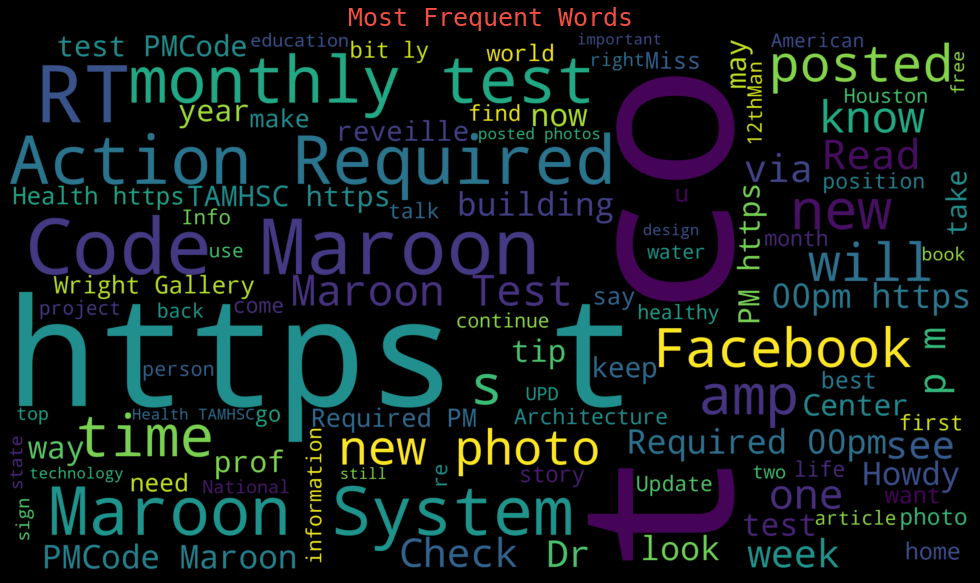

In [254]:
wordcloud = WordCloud(
    max_words=100, background_color="black", width=2_560, height=1_440
).generate(string)
plt.figure(figsize=(20, 10), facecolor="k")
plt.imshow(wordcloud, interpolation="bilinear")
title_text = f"""Most Frequent Words"""
plt.title(
    title_text,
    fontdict={
        "family": "monospace",
        "color": "#F34F41",
        "fontsize": 25,
        "fontweight": 15,
    },
)
plt.axis("off")
plt.show()